In [1]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


In [7]:
model = tf.keras.models.load_model("cats_and_dogs_samll_2.h5")
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 17, 17, 128)     

(1, 150, 150, 3)


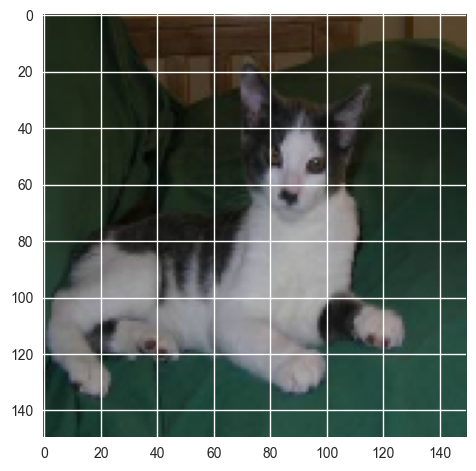

In [38]:
img_path = "C:\\Users\\1\\Desktop\\reinforcment_deep_ML\\cats_and_dogs_dataset\\train\\cats\\123.jpg"

img = tf.keras.preprocessing.image.load_img(img_path, target_size=(150, 150))
img_tensor = tf.keras.preprocessing.image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.
print(img_tensor.shape)
plt.imshow(img_tensor[0])


In [39]:
layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(img_tensor)

first_layer_activation = activations[4]
print(first_layer_activation.shape)
"""
plt.style.use("seaborn")
for depth_level in range(32):
    plt.matshow(first_layer_activation[0, :, :, depth_level], cmap="magma")

"""

1/1 [==============================] - 0s 67ms/step
(1, 34, 34, 128)


'\nplt.style.use("seaborn")\nfor depth_level in range(32):\n    plt.matshow(first_layer_activation[0, :, :, depth_level], cmap="magma")\n\n'

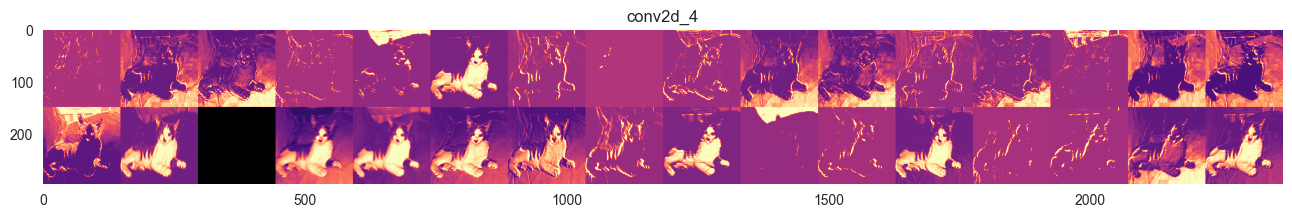

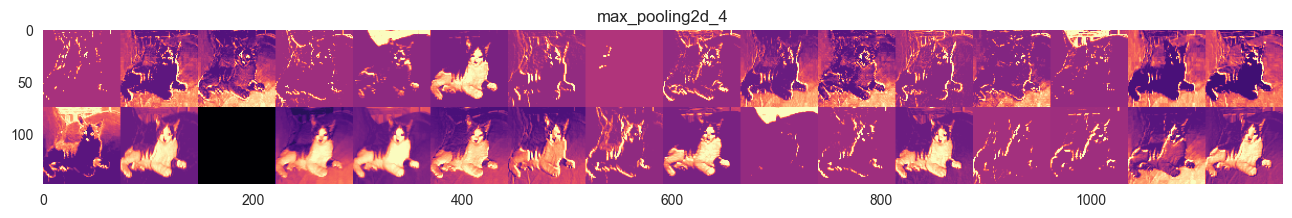

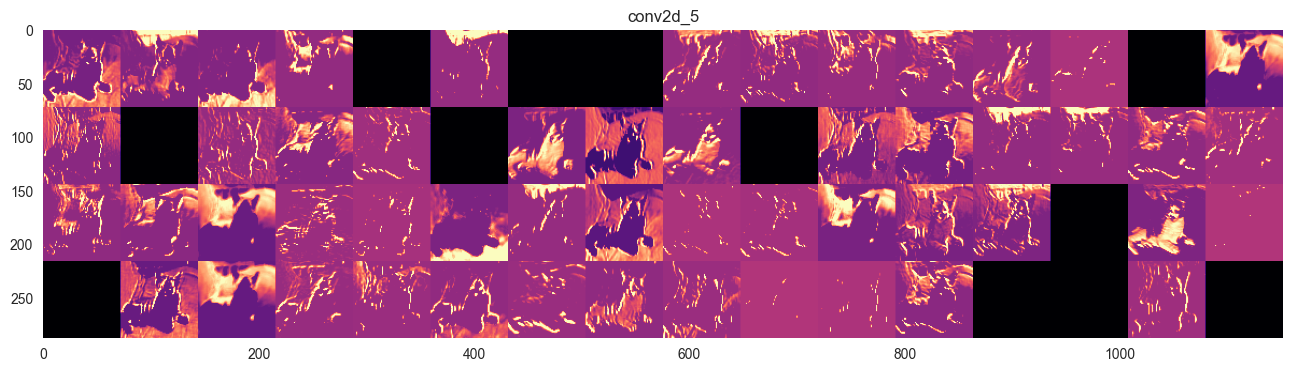

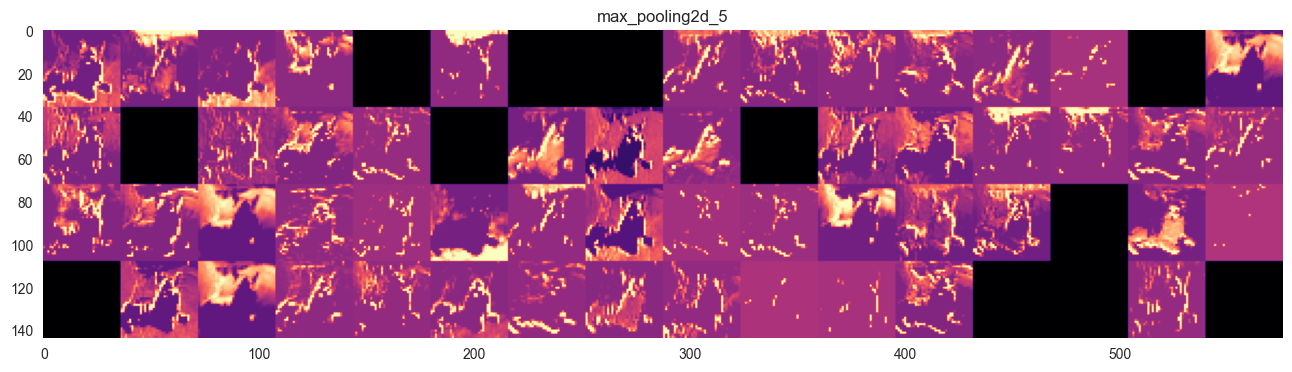

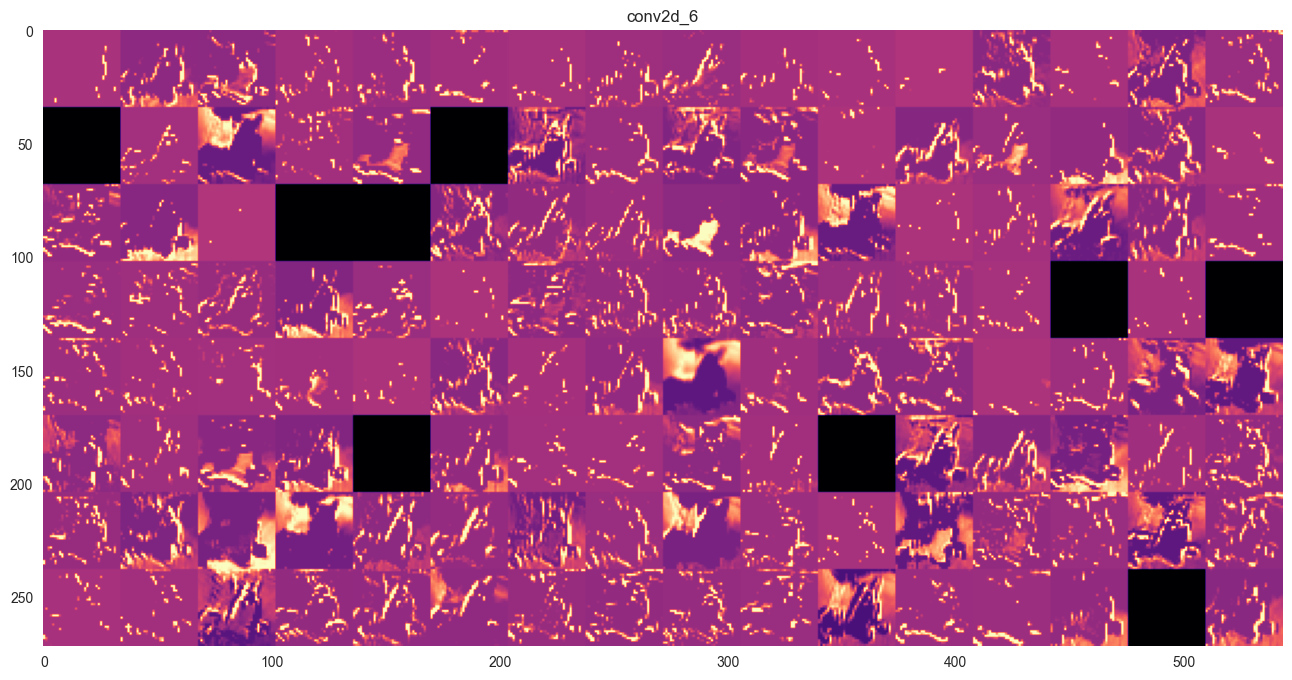

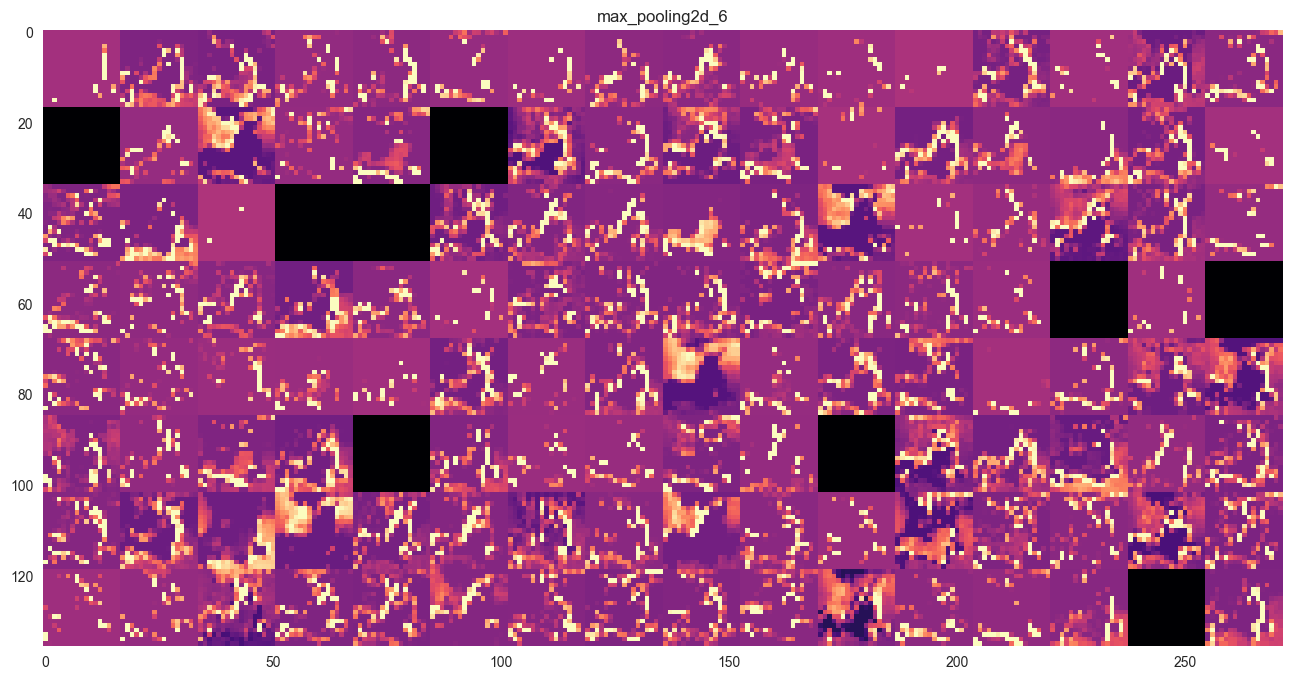

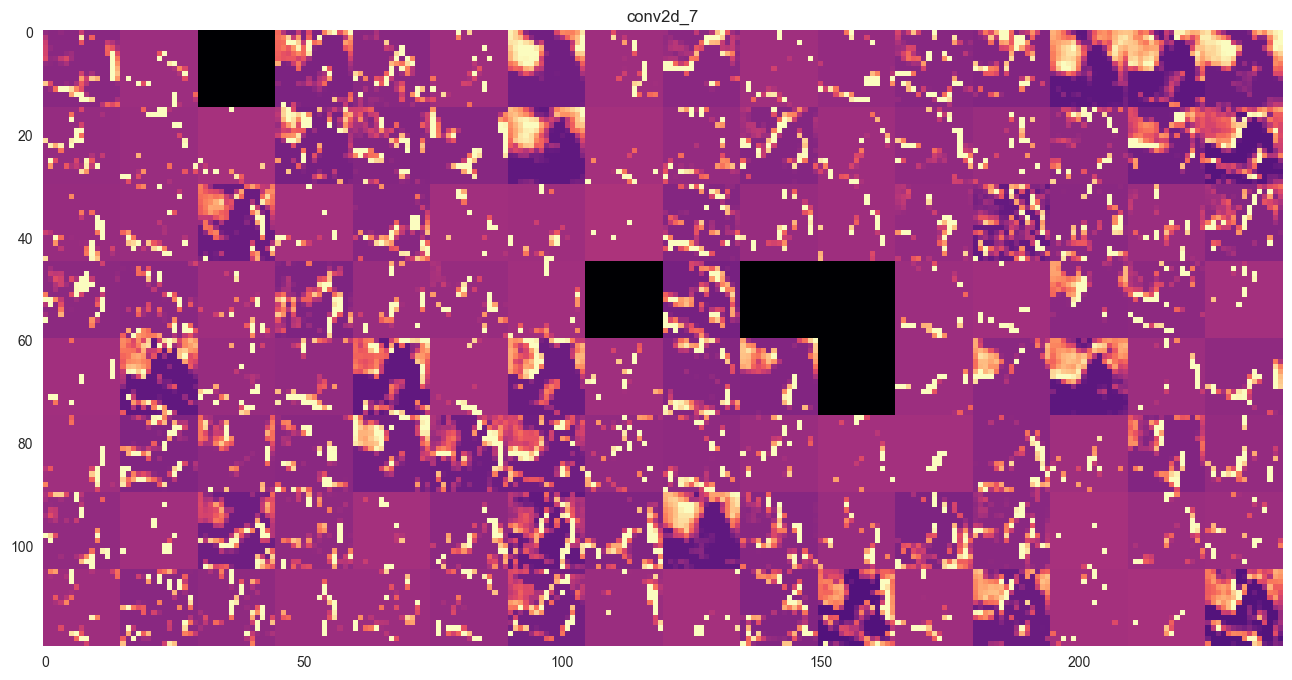

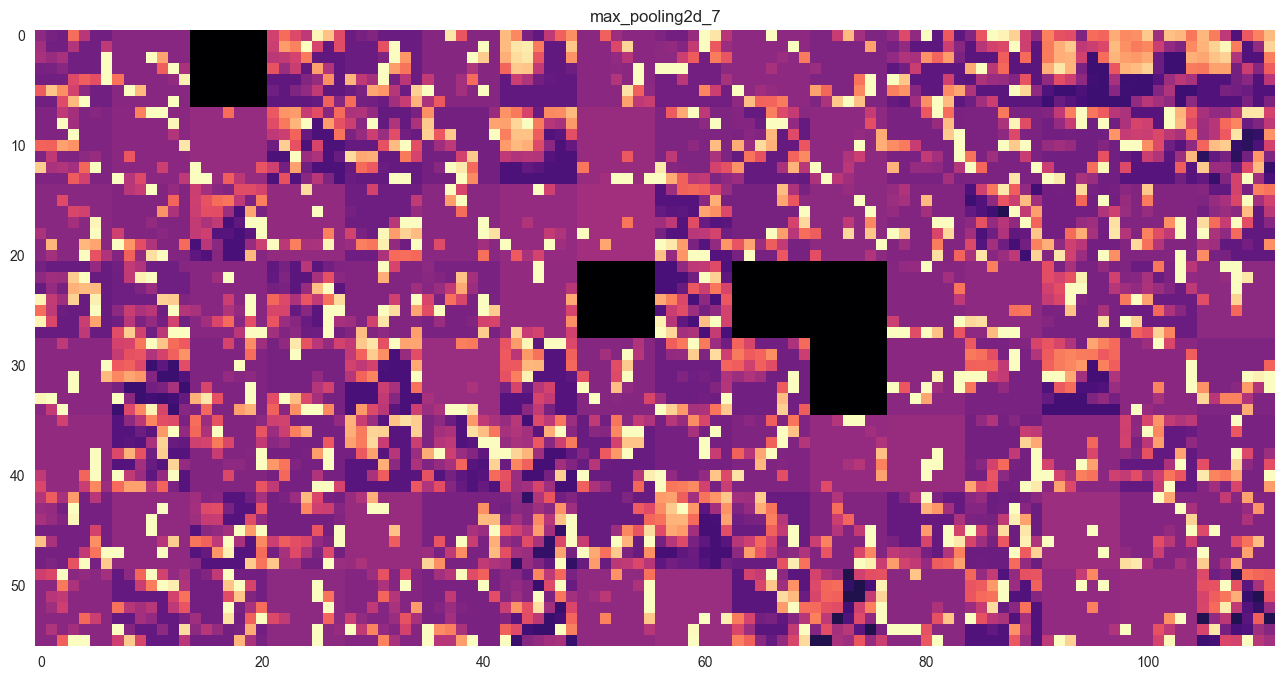

In [55]:
layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)

images_per_row = 16
for (layer_name, layer_activation) in zip(layer_names, activations):
    
    n_features = layer_activation.shape[-1]
    size = layer_activation.shape[1]

    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype("uint8")

            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image
    
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect="auto", cmap="magma")


визуализация фильтров сверточных нейронных сетей методом графдиентного спуска в пространстве входов

In [58]:
model = tf.keras.applications.VGG16(weights="imagenet",
                                    include_top=False)
tf.compat.v1.disable_eager_execution()

def deprocess_image(x):

    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1
    x += 0.5
    x = np.clip(x, 0, 1)
    x *= 255
    x = np.clip(x, 0, 255).astype("uint8")

    return x

def generate_pattern(layer_name, filter_index, size=150):

    layer_output = model.get_layer(layer_name).output
    loss = tf.keras.backend

    grads = tf.keras.backend.gradients(loss, model.input)[0]
    grads /= (tf.keras.backend.sqrt(tf.keras.backend.mean(tf.keras.backend.square(grads))) + 1e-5)

    iterate = tf.keras.backend.function([model.input], [loss, grads])
    input_img_data = np.random.random((1, size, size, 3)) * 20 + 128

    step = 1
    for i in range(40):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value * step
    
    img = input_img_data[0]

    return deprocess_image(img)

plt.imshow(generate_pattern("block3_conv1", 0))


TypeError: Failed to convert elements of <module 'keras.api._v2.keras.backend' from 'c:\\Users\\1\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\keras\\api\\_v2\\keras\\backend\\__init__.py'> to Tensor. Consider casting elements to a supported type. See https://www.tensorflow.org/api_docs/python/tf/dtypes for supported TF dtypes.

Визуализация тепловых карт активации класса